# ***LINEAR REGRESSION (Gradient Descent)***

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ***Training***

In [2]:
# Cost Function
def Cost(X, Y, theta):
  cost = (1/(2*(X.shape[0])))*(np.sum((np.dot(X, theta) - Y)**2))
  return cost

In [3]:
# Predict Function
def Predict(X, theta):
  return np.dot(X, theta)

In [4]:
# Function to calculate RMSE
def RootMeanSquaredError(Y, Prediction):
  return (np.sum((Prediction-Y)**2))**(0.5)

In [5]:
# Normalize Function
def NormalizeTrain(X):
  AverageList = []
  StdDevList = []

  for i in range(X.shape[1]):
    Average = np.mean(X[:,i])
    AverageList.append(Average)
    StdDev  = np.std(X[:,i])
    StdDevList.append(StdDev)
    X[:,i] = (X[:,i] - Average)/StdDev
  
  return X, AverageList, StdDevList


def NormalizeTest(X, AverageList, StdDevList):
  for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - AverageList[i])/StdDevList[i]
  
  return X

In [6]:
# Linear Regression Training Function using Gradient Descent
def LinearRegressionTraining(X, Y, theta, LearningRate, Iterations):
  m = Y.size
  CostList = []

  for i in range(Iterations):
    Y_Predicted = Predict(X, theta)
    cost = Cost(X, Y, theta)
    CostList.append(cost)
    
    d_theta = (np.dot(X.T, Y_Predicted - Y) / m)
    theta = theta - LearningRate*d_theta

  return theta, CostList

In [7]:
# Importing Training Data 
TrainingData = pd.read_csv('drive/MyDrive/Colab Notebooks/Linear_train.csv')
TrainingData.pop('Unnamed: 0')
TrainingData

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,label
0,-9.989516,1564.957586,8.199060,32.508797,19.464400,1644.524093,26.100966,34.731954,4378.575414,-14.151587,...,770.535311,30.060441,-25.002361,11.892468,-34.329383,37.218423,-4.440530,29.075092,29.107896,311.232491
1,-17.591800,1559.053039,12.302737,-36.351098,6.256406,1640.834263,12.954212,-43.333128,4833.766813,36.194771,...,997.260070,-1.329145,16.022086,42.972484,-7.372877,45.550946,37.576551,12.926551,-32.565844,6393.112342
2,-28.321695,1305.900952,-35.681049,-9.039358,-45.519426,2039.003363,-0.154348,18.107957,4162.395297,-42.268523,...,616.059291,-6.997085,27.846844,26.511376,19.323152,-35.807513,-5.913019,15.046779,-34.332357,2601.046223
3,-40.471241,1612.746996,-28.980454,2.137719,-34.767491,2757.469393,23.857472,-48.434183,4340.953927,35.960309,...,715.537625,-12.441561,47.883435,36.994884,30.783992,22.162383,16.465836,41.435425,33.561233,13572.118106
4,-36.525271,1852.275617,-32.744347,-1.439526,-14.061837,2138.422485,44.061988,33.336936,4099.453685,28.212499,...,629.221442,10.992360,-47.143335,-8.296962,-8.086565,39.169726,-49.540056,-32.518653,-36.320202,-5462.446898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38.882059,1829.766795,-9.597762,42.286077,-45.676532,2340.446842,44.758699,-49.232038,4561.096049,3.400968,...,931.215587,-19.667192,20.825892,18.055764,-40.074521,44.966776,30.681416,38.376682,33.942225,9034.945727
49996,-29.570690,1467.757407,-2.581269,8.699766,-32.209400,2065.685621,13.244693,-27.154067,4922.613361,32.830061,...,646.439398,45.407497,-41.574684,-41.278010,34.484129,16.631234,-10.488980,-11.637358,-25.774032,-6345.178110
49997,-26.656483,1081.812179,19.742925,-49.109287,-8.179490,1755.112415,-26.730046,-32.187078,4289.779346,30.641844,...,950.109763,-1.341077,-33.268738,32.604813,-17.198521,-29.136001,24.609231,11.935784,-35.190456,1483.917022
49998,49.470595,1418.823031,14.854524,-6.995360,27.184947,1235.231487,34.556613,-33.790945,4119.297411,36.747270,...,742.735044,-48.406474,-4.081799,20.777856,-49.422060,-31.251860,-27.546928,38.121308,-10.588040,10720.139180


In [8]:
# Initializing X (Feature Values) for training
X = np.array(TrainingData.drop('label', axis=1))
X, AverageList, StdDevList = NormalizeTrain(X)
X = np.concatenate((np.ones((X.shape[0],1)),X), axis=1)

print('X Shape : ', X.shape)
print(X)

X Shape :  (50000, 21)
[[ 1.         -0.34799407  0.22031433 ... -0.15582334  1.0052814
   1.00876462]
 [ 1.         -0.61114616  0.19984917 ...  1.29439989  0.44683234
  -1.12340336]
 [ 1.         -0.98256011 -0.67757616 ... -0.20664643  0.52015407
  -1.18447479]
 ...
 [ 1.         -0.924919   -1.45426802 ...  0.8468317   0.41256961
  -1.21414073]
 [ 1.          1.71021016 -0.28618815 ... -0.95334269  1.31811777
  -0.36359261]
 [ 1.         -0.90157434  0.61791579 ... -1.63664414 -0.1163058
  -1.67297842]]


In [9]:
# Initializing Y (Labels) for training
Y = np.array([TrainingData['label']]).T

print('Y Shape : ', Y.shape)
print(Y)

Y Shape :  (50000, 1)
[[  311.23249087]
 [ 6393.11234169]
 [ 2601.04622323]
 ...
 [ 1483.91702162]
 [10720.1391803 ]
 [ 2185.12795794]]


In [10]:
# Randomly Initializing Theta
theta = np.zeros((X.shape[1], 1))

print('theta shape : ', theta.shape)
print(theta)

theta shape :  (21, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [11]:
# Main / Determining Coefficient Values
Iterations = 1000
LearningRate = 0.1
theta, CostList = LinearRegressionTraining(X, Y, theta, LearningRate, Iterations)

print('theta shape : ', theta.shape)
print(theta)

theta shape :  (21, 1)
[[ 1537.40898405]
 [  374.84297316]
 [   57.66355878]
 [ -780.65390906]
 [  230.87239175]
 [ 1068.01409067]
 [   87.20446456]
 [  548.72479312]
 [ -837.63793397]
 [   34.67370773]
 [  662.52453914]
 [  896.38283869]
 [   86.47649282]
 [-2631.25005955]
 [  980.57481622]
 [ 1301.44464438]
 [ 1476.95436293]
 [  693.42415381]
 [  -29.25523734]
 [ 2746.11651838]
 [  723.36220031]]


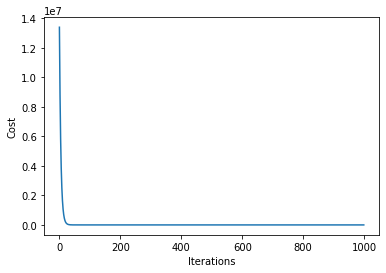


Initial Cost   :  13398388.663990432
Minimized Cost :  1907.0986737789897


In [12]:
# Minimized Cost and Graph
rng = np.arange(0, len(CostList))
plt.plot(rng, CostList)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print('\nInitial Cost   : ', CostList[0])
cost = Cost(X, Y, theta)
print('Minimized Cost : ', cost)

In [13]:
# Predicting Training labels
Y_Predicted = Predict(X, theta)

print('[[  EXPECTED    :    PREDICTED ]]')
print(np.concatenate((Y, Y_Predicted), axis=1))

print('\nRoot Mean Squared Error :', RootMeanSquaredError(Y, Y_Predicted))

[[  EXPECTED    :    PREDICTED ]]
[[  311.23249087   219.57758205]
 [ 6393.11234169  6349.85652897]
 [ 2601.04622323  2591.47498219]
 ...
 [ 1483.91702162  1481.12972159]
 [10720.1391803  10715.72943535]
 [ 2185.12795794  2186.58096826]]

Root Mean Squared Error : 13809.774342033941


## ***Testing***

In [14]:
# TESTING
# Importing Data
TestingData = pd.read_csv('drive/MyDrive/Colab Notebooks/Linear_test.csv')
TestingData.pop('Unnamed: 0')
TestingData

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,label
0,40.790740,1187.897579,-28.941991,43.498302,14.157983,2536.000797,-34.181638,-14.940211,4746.739893,-25.100480,...,707.727094,21.030812,-44.606156,-9.625546,42.276162,-11.000471,-19.830564,-5.529430,-28.154864,-163.522723
1,47.968749,1498.588679,24.922821,-38.979082,16.405452,1798.950305,-23.660484,-34.792328,4076.982013,16.042125,...,737.135391,-17.860346,42.274026,-19.886483,16.337922,9.025313,27.760845,21.484409,-24.206545,6484.664510
2,9.762564,1316.354415,1.170771,10.365178,-11.993156,2714.382200,26.382837,27.442924,4178.719984,-17.156579,...,940.732329,-35.879432,23.837924,3.729191,33.564390,12.848880,-45.837834,-49.592176,36.688611,2393.818082
3,6.414629,1895.586749,44.496934,-49.677800,-24.825833,2327.316373,1.406644,44.103008,4586.697737,-10.834562,...,925.441952,-19.409771,25.346975,-7.729920,-42.813516,-17.666168,35.506064,-49.048652,-34.048583,-9397.072355
4,-4.112012,1130.920162,19.103960,-8.741503,-28.589701,1299.418975,42.946135,4.758032,4809.536369,42.375164,...,797.953813,-46.788081,43.876292,34.009303,34.061089,-30.182903,-41.188733,26.828040,-22.476663,10487.323575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-37.802773,1204.712095,30.916166,-32.185868,-1.860028,1515.265232,-43.103776,12.911176,4865.716464,-28.856194,...,877.773521,-14.401216,-1.152501,9.371124,-16.953167,5.590761,27.769178,-42.025878,-46.347044,-7526.092452
9996,21.841410,1067.350891,-9.598592,13.545191,2.910106,1286.431551,-49.542330,27.868152,4513.212740,46.710495,...,518.544504,-4.202304,-6.779170,2.384596,20.661830,-7.804846,-3.170458,39.886812,-17.630468,6133.716734
9997,-34.734278,1630.673420,27.359399,-0.718695,-24.225154,1309.956055,36.839488,-40.966273,4747.087919,-45.279378,...,948.924788,-31.628023,-5.662373,-45.441406,-33.063193,-23.153715,-7.089845,-25.366712,47.034834,-1404.204034
9998,-30.752354,1610.117693,-37.652326,-46.959112,18.151935,2489.587758,-33.802220,-11.550250,4912.443446,-49.993634,...,656.905027,-48.696117,-20.709813,-27.404294,14.174336,40.169075,37.329627,-27.968720,-18.475040,1972.371711


In [15]:
# Initializing X_test
X_test = np.array(TestingData.drop('label', axis=1))
X_test = NormalizeTest(X_test, AverageList, StdDevList)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test), axis=1)

print('X_test shape : ', X_test.shape)
print(X_test)

X_test shape :  (10000, 21)
[[ 1.          1.40975807 -1.08657594 ... -0.6870117  -0.19141266
  -0.97090816]
 [ 1.          1.65822395 -0.00972035 ...  0.95560992  0.74278028
  -0.83440791]
 [ 1.          0.3357217  -0.64134445 ... -1.5846549  -1.71519115
   1.27084306]
 ...
 [ 1.         -1.20453086  0.44808546 ... -0.24726467 -0.87742582
   1.62852991]
 [ 1.         -1.06669707  0.3768393  ...  1.28587727 -0.96740849
  -0.63625988]
 [ 1.          1.37400893 -0.48664112 ...  1.31957967 -0.0979464
  -1.33366307]]


In [16]:
# Initializing Y_test
Y_test = np.array([TestingData['label']]).T

print('Y_test shape : ', Y_test.shape)
print(Y_test)

Y_test shape :  (10000, 1)
[[ -163.52272341]
 [ 6484.66451042]
 [ 2393.81808186]
 ...
 [-1404.204034  ]
 [ 1972.37171111]
 [-6120.24877236]]


In [17]:
# Predicting test labels
Y_test_Predicted = Predict(X_test, theta)

print('[[  EXPECTED    :    PREDICTED ]]')
print(np.concatenate((Y_test, Y_test_Predicted), axis=1))

print('\nRoot Mean Squared Error :', RootMeanSquaredError(Y_test, Y_test_Predicted))

[[  EXPECTED    :    PREDICTED ]]
[[ -163.52272341  -161.95570335]
 [ 6484.66451042  6482.4941135 ]
 [ 2393.81808186  2397.24820136]
 ...
 [-1404.204034   -1402.9354843 ]
 [ 1972.37171111  1976.02602503]
 [-6120.24877236 -6119.77479909]]

Root Mean Squared Error : 182.86875419744072
